In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Programacion import ModeloArima

In [2]:
Datos = pd.read_csv('../Alemania_Reducida.csv')
Datos['2'] = pd.to_datetime(Datos['2'], format= '%Y')
Datos.set_index('2',inplace = True)
PBI = pd.DataFrame()
PBI['Datos'] = Datos['PIB (US$ a precios constantes de 2010)'].dropna()
PBI["Logaritmico"] = np.log(PBI['Datos'])
PBI["Rendimientos"] = PBI['Logaritmico'].diff(1)
PBI.dropna(axis = 0, inplace= True)


In [3]:
Palabra = [cadena for cadena in Datos.columns if "PIB (US" in cadena]
print(Palabra)

['PIB (US$ a precios actuales)', 'PIB (US$ a precios constantes de 2010)']


In [4]:

PBI.head()

,Datos,Logaritmico,Rendimientos
2,,,
1971-01-01,1.442604e+12,27.997471,0.030846
1972-01-01,1.504641e+12,28.039575,0.042104
1973-01-01,1.576525e+12,28.086244,0.046669
1974-01-01,1.590557e+12,28.095106,0.008861
1975-01-01,1.576771e+12,28.086400,-0.008705


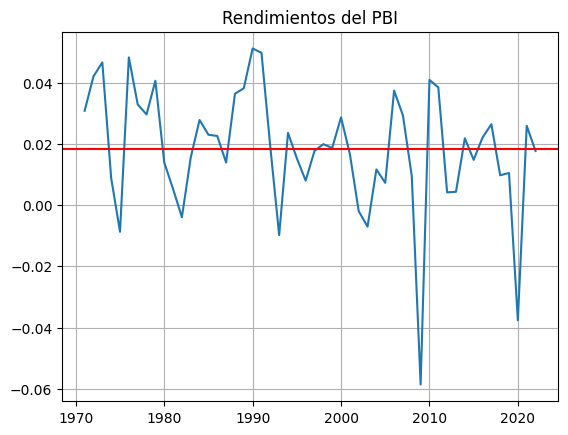

count    52.000000
mean      0.018276
std       0.020401
min      -0.058624
25%       0.009380
50%       0.018872
75%       0.029943
max       0.051216
Name: Rendimientos, dtype: float64

In [5]:
plt.plot(PBI['Rendimientos'])
plt.title('Rendimientos del PBI')
plt.grid()
plt.axhline(y = PBI['Rendimientos'].mean(), color = 'red')
plt.show()
PBI['Rendimientos'].describe()

In [6]:
ft = PBI['Rendimientos']
modelo = ModeloArima(ft)
#modelo.Pruebatoolkit(5)


In [7]:
modelo.ModeloARMA(1,1)
print(modelo.summary)

                               SARIMAX Results                                
Dep. Variable:           Rendimientos   No. Observations:                   52
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 130.158
Date:                Sat, 25 Nov 2023   AIC                           -252.317
Time:                        17:43:52   BIC                           -244.512
Sample:                    01-01-1971   HQIC                          -249.325
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0182      0.004      4.613      0.000       0.010       0.026
ar.L1         -0.2656      0.911     -0.292      0.771      -2.051       1.519
ma.L1          0.4607      0.915      0.504      0.6

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


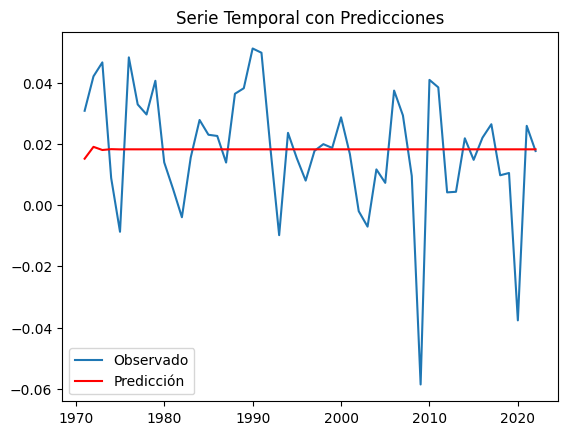

In [8]:
modelo.Prediccion()